In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import re #etude des chaine de caractere

# Projet Anti-Spam à l'aide du jeu de message fourni par @Montaut

nettoyage des donnees  
creation jeu de test/train  
dico de fréquence  
calcul de proba

### Nettoyage de la base de données

In [2]:
input_file = "spam.csv"
default = pd.read_csv(input_file)
default.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
base = default.dropna()

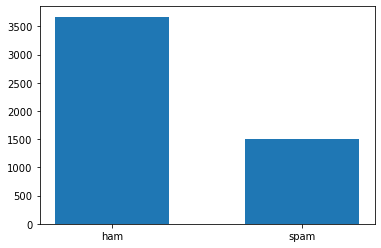

Nombre de mail : 5171
Nombres de mots différents : 50485


In [4]:
cpt_ham = 0
cpt_spam = 0
mot = set()
for i in range (base.size // 4):
    t = base.iloc[i]
    for w in (re.findall(r"[\w]+",base.iloc[i][2])):
        mot.add(w)
    if t[3] == 0:
        cpt_ham+=1
    else:
        cpt_spam+=1
x = ['ham','spam']
y = [cpt_ham,cpt_spam]

plt.bar(x,y, width = 0.6)
plt.show()
print("Nombre de mail :",cpt_ham+cpt_spam)
print("Nombres de mots différents :", len(mot))

In [5]:
print(mot)

{'pzmlwyj', 'concocter', 'qfg', 'staines', 'blakey', 'banigan', 'learnings', 'tri', 'flowed', 'ihii', '529', 'bracket', 'hylton', 'linux', 'celestebrindle', 'baer', '4449', 'flannel', 'gamophyllous', 'vitra', 'absenteeism', 'jurisdiction', '1521', 'iceoe', 'disclosing', 'ironstonetotem', 'shrimp', '447092807619', 'rotogravure', 'twic', 'corinthian', '603107', 'mickelson', 'significantiy', 'quicker', 'vxabe', 'impermissible', 'greenspan', 'unionpacresinc', 'recording', 'funuksocytjbr', 'middleton', 'production', 'phosphorescent', 'endothermic', 'orwellian', 'roady', 'inviolate', 'what', 'dream', 'yhich', 'htmlheadmeta', 'trainman', 'adaptation', 'illiteracy', 'slack', 'ppedsj', '88238860', 'campos', 'lisk', 'xife', 'gratuities', 'hmxfyoisv', 'hobson', 'expectations', 'haberman', 'belch', 'conjecturing', 'widths', 'reflnance', 'frsmusksk', 'wntpb', 'agouti', 'danke', 'fkf', 'there', 'sometime', 'chrvg', 'anhydrous', 'mdouglas', 'nametag', 'chauncey', 'tenasksa', 'noon', 'xecxm', 'retrofi

In [6]:
len(mot)

50485

On ne va garder que les colonnes "text" et "label_num" qui seront nos X et Y pour notre ia

In [7]:
datalist = base.values.tolist()
X = [ [datalist[_][2]] for _ in range(len(datalist)) ]
Y = [ [datalist[_][3]] for _ in range(len(datalist)) ]

avant nettoyage

In [8]:
print(X[0])

["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."]


apres nettoyage

In [9]:
print(re.findall(r"[\w]+",X[0][0]))

['Subject', 'enron', 'methanol', 'meter', '988291', 'this', 'is', 'a', 'follow', 'up', 'to', 'the', 'note', 'i', 'gave', 'you', 'on', 'monday', '4', '3', '00', 'preliminary', 'flow', 'data', 'provided', 'by', 'daren', 'please', 'override', 'pop', 's', 'daily', 'volume', 'presently', 'zero', 'to', 'reflect', 'daily', 'activity', 'you', 'can', 'obtain', 'from', 'gas', 'control', 'this', 'change', 'is', 'needed', 'asap', 'for', 'economics', 'purposes']


On considere nos messages comme une liste de mot

In [10]:
# permet de nettoyer chaque liste de tous les petits mots inutiles
X = [re.findall(r"[\w]+",X[_][0]) for _ in range(len(X))]

## Creation de nos jeux d'usages

In [11]:
from sklearn.model_selection import train_test_split as ttc
X_train, X_test, Y_train, Y_test = ttc(X, Y, test_size= 0.2,random_state = 0)

## Construction du dictionnaire de mots

- Dictionnaire de fréquence

In [12]:
def construction_dico_frequence(X,Y,taille_mot):
    dict_mot_frequence = dict()
    for i in range(len(X)):
        for mot in X[i]:
            if Y[i][0] == 0: #si c'est un ham
                if len(mot) > taille_mot: #on retire les mots de longueur
                    try :
                        (value_ham,value_spam) = dict_mot_frequence[mot] 
                        dict_mot_frequence[mot] = (value_ham + 1, value_spam)
                    except:
                        dict_mot_frequence[mot] = (1, 0)
            else: #si c'est un spam
                if len(mot) > taille_mot: #on retire les mots de longueur
                    try:
                        (value_ham,value_spam) = dict_mot_frequence[mot] 
                        dict_mot_frequence[mot] = (value_ham, value_spam+ 1)
                    except:
                        dict_mot_frequence[mot] = (0, 1)
            '''#ajout des points
            if len(mot) > taille_mot: #on retire les mots de longueur
                value = dict_mot_frequence.get(mot, None)
                if value is not None: 
                    dict_mot_frequence[mot] = value + 1
                else:
                    dict_mot_frequence[mot] = 1
            '''
    return dict_mot_frequence

In [13]:
dico = (construction_dico_frequence(X_test,Y_test,0))
print(dico)

{'Subject': (732, 303), 'ship': (2, 10), 'channel': (10, 5), 'hub': (21, 1), 'co': (36, 9), 'please': (520, 98), 'review': (24, 18), 'comment': (2, 0), 'on': (1258, 271), 'the': (3731, 1597), 'attached': (200, 1), 'presentation': (4, 0), 'gary': (120, 0), 'can': (295, 137), 'you': (1109, 540), 'and': (1510, 997), 'jd': (3, 0), 'take': (66, 24), 'ownership': (3, 2), 'of': (1186, 980), 'this': (990, 504), 'once': (34, 8), 'we': (676, 229), 'incorporate': (2, 0), 'everyone': (25, 7), 's': (402, 253), 'comments': (19, 0), 'set': (60, 13), 'up': (195, 74), 'a': (1216, 768), 'meeting': (37, 3), 'with': (503, 294), 'air': (6, 3), 'products': (38, 55), 'dow': (32, 1), 'others': (10, 4), 'to': (3081, 1084), 'discuss': (17, 0), 'thanks': (388, 22), 'brian': (44, 1), 'feb': (64, 7), '2000': (873, 16), 'intercompany': (8, 0), 'accrual': (6, 1), 'variances': (4, 0), 'below': (87, 26), 'is': (1043, 515), 'list': (79, 24), 'sitara': (197, 0), 'deals': (183, 6), 'that': (718, 298), 'had': (75, 26), 'v

# ---

# Premier pas _ Ponderation des Mots

# ---

- Ponderation des mots

In [14]:
def ponderation(dico):
    resultat = dict()
    for mot in dico:
        
        freq_ham,freq_spam = dico[mot]
        
        calcul = (freq_ham-freq_spam) / (freq_ham+freq_spam)
        
        if calcul !=0:
            resultat[mot] = calcul
    return resultat

In [15]:
resultat = ponderation(dico)
print(resultat)

{'Subject': 0.4144927536231884, 'ship': -0.6666666666666666, 'channel': 0.3333333333333333, 'hub': 0.9090909090909091, 'co': 0.6, 'please': 0.6828478964401294, 'review': 0.14285714285714285, 'comment': 1.0, 'on': 0.6455199476782211, 'the': 0.4005255255255255, 'attached': 0.9900497512437811, 'presentation': 1.0, 'gary': 1.0, 'can': 0.36574074074074076, 'you': 0.34505761067313523, 'and': 0.20462704427602713, 'jd': 1.0, 'take': 0.4666666666666667, 'ownership': 0.2, 'of': 0.0951061865189289, 'this': 0.3253012048192771, 'once': 0.6190476190476191, 'we': 0.49392265193370166, 'incorporate': 1.0, 'everyone': 0.5625, 's': 0.22748091603053436, 'comments': 1.0, 'set': 0.6438356164383562, 'up': 0.44981412639405205, 'a': 0.22580645161290322, 'meeting': 0.85, 'with': 0.26223337515683814, 'air': 0.3333333333333333, 'products': -0.1827956989247312, 'dow': 0.9393939393939394, 'others': 0.42857142857142855, 'to': 0.4794717887154862, 'discuss': 1.0, 'thanks': 0.8926829268292683, 'brian': 0.95555555555555

# Etude sur le jeu de test

In [16]:
def predict(referentiel,message,affichage):
    #utiliser le principe de la balance
    valeur = 0
    j=0
    for mot in message:
        try:
            poid = referentiel[mot]
            valeur += poid
            j+=1
        except:
            pass
        pass
    
    if valeur > 0:
        if affichage :
            print(valeur,'             ',len(message))
        return 0
    else:
        if affichage :
            print(valeur,'             ',len(message))
        return 1

In [17]:
def verification(referentiel,X_test,Y_test,affichage):
    if affichage:
        print("Poid du message      /      Longueur du message")
    
    correct = 0
    total = len(Y_test)
    
    for i in range(len(X_test)): #pour chaque message
        
        valeur = predict(referentiel,X_test[i],affichage)
        if affichage:
            print("->",valeur,"/",Y_test[i][0],end ="")
            if valeur != Y_test[i][0]:
                print("                      ERROR")
            else:
                print()
            print('-----------------------------------')
        if valeur == Y_test[i][0]:
            correct += 1
        
    print('Correct:', correct)
    print('Incorrect:', total - correct)
    print('Accuracy:', correct/total)
    return correct/total


In [18]:
affichage = True
resultat = verification(resultat,X_test,Y_test,affichage)

Poid du message      /      Longueur du message
22.69969451385909               43
-> 0 / 0
-----------------------------------
175.40353667873185               261
-> 0 / 0
-----------------------------------
43.326701790000556               77
-> 0 / 0
-----------------------------------
-11.19797686799014               47
-> 1 / 1
-----------------------------------
37.021145697145855               57
-> 0 / 0
-----------------------------------
21.221695960822146               33
-> 0 / 0
-----------------------------------
341.0681141603921               541
-> 0 / 0
-----------------------------------
172.9887663606357               257
-> 0 / 0
-----------------------------------
62.27931327901664               143
-> 0 / 0
-----------------------------------
-212.36781449905124               1422
-> 1 / 1
-----------------------------------
-32.42018237949625               133
-> 1 / 1
-----------------------------------
353.4340955254748               564
-> 0 / 0
------------

-> 0 / 0
-----------------------------------
-130.87403238690524               216
-> 1 / 1
-----------------------------------
43.70839306949635               61
-> 0 / 0
-----------------------------------
88.98382171017879               147
-> 0 / 0
-----------------------------------
288.90155417794944               397
-> 0 / 0
-----------------------------------
-9.309949054379857               131
-> 1 / 1
-----------------------------------
59.655949497841625               100
-> 0 / 0
-----------------------------------
82.49810765782134               118
-> 0 / 0
-----------------------------------
33.79183729147716               65
-> 0 / 0
-----------------------------------
-5.5256743733404345               27
-> 1 / 1
-----------------------------------
-1.3845701881381574               20
-> 1 / 1
-----------------------------------
73.58032343895066               123
-> 0 / 0
-----------------------------------
-13.302603291461278               98
-> 1 / 1
-------------

24.229442447027186               33
-> 0 / 0
-----------------------------------
0.35628526487510026               566
-> 0 / 1                      ERROR
-----------------------------------
31.247756678478183               64
-> 0 / 0
-----------------------------------
13.392480824172306               249
-> 0 / 1                      ERROR
-----------------------------------
-13.316195969684465               214
-> 1 / 1
-----------------------------------
19.776235574026806               31
-> 0 / 0
-----------------------------------
55.02682404299854               107
-> 0 / 0
-----------------------------------
584.6338034011376               834
-> 0 / 0
-----------------------------------
35.8566936343919               81
-> 0 / 0
-----------------------------------
14.387649907150102               16
-> 0 / 0
-----------------------------------
284.3417757628597               510
-> 0 / 0
-----------------------------------
302.5538961667665               457
-> 0 / 0
-------

-> 0 / 0
-----------------------------------
70.09983322052314               96
-> 0 / 0
-----------------------------------
112.77949439436696               220
-> 0 / 0
-----------------------------------
163.52793326646446               219
-> 0 / 0
-----------------------------------
67.28327137966019               94
-> 0 / 0
-----------------------------------
153.44764344146964               323
-> 0 / 0
-----------------------------------
-141.25179088321167               182
-> 1 / 1
-----------------------------------
-16.286077796778965               122
-> 1 / 1
-----------------------------------
11.664006031806426               258
-> 0 / 1                      ERROR
-----------------------------------
21.91536099564687               25
-> 0 / 0
-----------------------------------
72.99667363197848               169
-> 0 / 0
-----------------------------------
116.84142760108361               168
-> 0 / 0
-----------------------------------
32.49449043223967              

148.88626006798484               226
-> 0 / 0
-----------------------------------
44.68163828424336               58
-> 0 / 0
-----------------------------------
43.03273818448404               60
-> 0 / 0
-----------------------------------
126.18618743523018               156
-> 0 / 0
-----------------------------------
32.07412496030171               49
-> 0 / 0
-----------------------------------
25.95734581775785               44
-> 0 / 0
-----------------------------------
26.028098220796714               52
-> 0 / 0
-----------------------------------
13.313160890288204               16
-> 0 / 0
-----------------------------------
75.4693873643762               117
-> 0 / 0
-----------------------------------
-2.2279094643703647               7
-> 1 / 1
-----------------------------------
15.460095999991308               17
-> 0 / 0
-----------------------------------
33.00707546665389               56
-> 0 / 0
-----------------------------------
55.48556553161042               

83.93473139221422               121
-> 0 / 0
-----------------------------------
51.42793227454847               100
-> 0 / 0
-----------------------------------
-121.25280568647064               1212
-> 1 / 1
-----------------------------------
20.69998512868228               33
-> 0 / 0
-----------------------------------
22.04394319044218               42
-> 0 / 0
-----------------------------------
12.891725566927711               19
-> 0 / 0
-----------------------------------
356.8287921803796               789
-> 0 / 0
-----------------------------------
49.28792445817086               69
-> 0 / 0
-----------------------------------
-14.664329487245306               96
-> 1 / 1
-----------------------------------
-87.70906079066525               607
-> 1 / 1
-----------------------------------
463.0306933849145               647
-> 0 / 0
-----------------------------------
10.70683531642287               18
-> 0 / 0
-----------------------------------
172.48344353866966         

37.1478917327215               71
-> 0 / 0
-----------------------------------
30.391367697662123               44
-> 0 / 0
-----------------------------------
126.2998911850782               330
-> 0 / 0
-----------------------------------
59.41712992888473               86
-> 0 / 0
-----------------------------------
20.176470825698008               34
-> 0 / 0
-----------------------------------
-13.032589304293115               34
-> 1 / 1
-----------------------------------
113.645433131643               294
-> 0 / 0
-----------------------------------
39.87334718559233               65
-> 0 / 0
-----------------------------------
-94.03176233719518               204
-> 1 / 1
-----------------------------------
14.231440880276585               16
-> 0 / 0
-----------------------------------
17.594369083165496               21
-> 0 / 0
-----------------------------------
28.91062007930613               44
-> 0 / 0
-----------------------------------
-12.261571028916226             

In [19]:
print((resultat)*100,'%')

93.91304347826087 %


Cette premiere approche nous donne un resultat interessant, il pourrait etre ameliorer. Laissons-le est etudions une approche probabiliste.

# ---

# Utilisation simple de BernoulliNB()

# ---

In [20]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

X_train : liste de liste de mot -> changer en liste de presence cf https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html </br>
Y_train : liste de valeur [1] ou [0]

In [21]:
nb_total_mot = set()
for message in X_train:
    for mot in message:
        nb_total_mot.add(mot) 


In [22]:
print(len(nb_total_mot))

43525


43 525 est le nombre de parametre maximale que l'on peut utiliser.

Reduisons ce parametre au X = 100 mots les plus frequents chez les spams et les hams _ soit 200 mots au maximum

In [23]:
def frequencage_mots(X_train,min_longueur):
    dict_mot_ham = dict()
    dict_mot_spam = dict()

    for index in range(len(X_train)):
        #check if spam
        if Y_train[index][0] == 1:
            for mot in X_train[index]:
                if len(mot) >= min_longueur:
                    value = dict_mot_spam.get(mot, None)
                    if value is not None: 
                        dict_mot_spam[mot] = value+1
                        pass
                    else:
                        dict_mot_spam[mot] = 1
                        pass
                    pass
                pass
            pass
        else:
            for mot in X_train[index]:
                if len(mot) >= min_longueur:
                    value = dict_mot_ham.get(mot, None)
                    if value is not None: 
                        dict_mot_ham[mot] = value+1
                        pass
                    else:
                        dict_mot_ham[mot] = 1
                        pass
                    pass
                pass
            pass
        pass
    return (dict_mot_ham,dict_mot_spam)

In [24]:
min_longueur = 3
dict_mot_ham,dict_mot_spam = frequencage_mots(X_train,min_longueur)

In [25]:
print(dict_mot_ham)

{'Subject': 2940, 'meter': 2027, '986296': 2, 'scherlyn': 1, 'per': 344, 'our': 834, 'conversation': 38, 'here': 296, 'the': 14628, 'and': 6402, 'months': 120, 'feb': 207, 'march': 418, 'this': 3888, 'needs': 257, '012': 63, '41500': 26, '015': 16, 'contract': 702, 'thank': 253, 'you': 4256, 'sherlyn': 129, 'let': 851, 'know': 1119, 'enter': 76, 'new': 804, 'track': 64, 'tom': 225, 'natural': 152, 'gas': 2262, 'nomination': 473, 'for': 6345, 'enron': 5268, 'methanol': 109, 'nominates': 38, 'following': 479, 'requirements': 65, 'plant': 367, 'august': 262, '2000': 3435, '000': 1509, 'mmbtu': 1061, 'day': 682, 'egpfc': 19, 'mtbe': 36, 'morgan': 54, 'point': 228, '500': 165, 'cleburne': 95, 'outage': 92, 'gentlemen': 5, 'wanted': 105, 'clarify': 14, 'length': 10, 'that': 2701, 'started': 41, 'today': 236, 'site': 61, 'earliest': 9, 'will': 2749, 'line': 219, 'wednesday': 123, 'morning': 119, 'anything': 133, 'found': 58, 'beyond': 8, 'cracked': 2, 'transition': 48, 'piece': 18, 'clogged':

In [26]:
print(dict_mot_spam)

{'Subject': 1196, 'mon': 7, 'feb': 12, '2004': 270, '0500': 10, 'page': 40, 'loading': 17, 'image': 24, 'not': 788, 'showing': 8, 'view': 54, 'message': 232, 'here': 482, 'discon': 2, 'jyz': 1, 'pbb': 1, 'tugjf': 1, 'rqw': 1, 'blmgn': 1, 'qysmk': 1, 'kthj': 1, 'wmwahq': 1, 'qwpjol': 1, 'pzxy': 1, 'zomtc': 1, 'cmt': 1, 'vpikl': 1, 'rcsi': 1, 'hroud': 1, 'taeja': 1, 'wvxwy': 1, 'qkhf': 1, 'rqfis': 1, 'ssgmhd': 1, 'nyrrit': 1, 'gpicpu': 1, 'zdz': 1, 'uqbeky': 1, 'fhnmke': 1, 'kvus': 1, 'fagq': 1, 'vmxwpz': 1, 'lpsrbt': 1, 'gaf': 1, 'mjvwf': 1, 'rwxr': 1, 'nwzbw': 1, 'qvod': 1, 'hunan': 1, 'asqoc': 1, 'kjb': 1, 'haxlpt': 1, 'qrhgm': 1, 'laeioe': 1, 'kgpa': 1, 'tohcs': 1, 'jshui': 1, 'gyuphj': 1, 'sjra': 1, 'wxjc': 1, 'mxiaen': 1, 'qyl': 1, 'tvd': 1, 'tztc': 1, 'gvsxx': 1, 'vxdy': 1, 'pxurd': 1, 'mvgxvb': 1, 'aenax': 1, 'kdned': 1, 'wyhby': 1, 'sxqjax': 1, 'wdutgo': 1, 'lewiu': 1, 'mjl': 1, 'vjpf': 1, 'qyc': 1, 'qnqo': 1, 'mtfhaw': 1, 'laxtwg': 1, 'hrycaq': 1, 'kgio': 1, 'ydjmox': 1, 'wfi':

In [27]:
def extraction_mot(nb_mot,dict_mot_spam,min_frequence):
    x = 1000
    y = 5

    sauvegarde = dict(dict_mot_spam)

    liste = set()
    i=0
    while i != nb_mot or len(sauvegarde)==len(liste):
        #recherche de la plus grande valeur du dico
        grand_mot = None
        valeur = 0

        a = dict(sauvegarde)

        for mot in a:
            if dict_mot_spam[mot] <= min_frequence:
                sauvegarde.pop(mot)
                pass        
            elif dict_mot_spam[mot] > valeur:
                grand_mot, valeur = mot, dict_mot_spam[mot]
                pass
            pass
        liste.add(grand_mot)
        sauvegarde.pop(grand_mot)
        i+=1
        pass

    return liste

In [28]:
liste_spam = extraction_mot(100,dict_mot_spam,5)
liste_ham = extraction_mot(100,dict_mot_ham,5)

In [29]:
liste_mot = list(liste_spam) + list(liste_ham)

In [30]:
print(liste_mot)

['use', 'these', 'investment', 'color', 'click', 'out', 'and', 'our', 'more', 'will', 'just', 'software', 'http', 'size', 'today', 'information', 'line', 'has', 'like', 'online', 'email', 'for', 'what', 'about', 'that', 'contact', 'stock', '2004', 'from', 'all', 'they', 'statements', 'there', 'here', 'want', 'company', 'width', 'can', 'was', 'but', 'over', 'price', 'any', 'have', 'money', 'this', 'net', 'time', 'save', 'align', 'looking', 'face', 'one', 'business', 'report', '000', 'border', 'best', 'need', 'not', 'with', 'windows', 'www', 'only', 'com', 'new', 'pills', 'its', 'are', 'inc', 'been', 'other', 'securities', 'you', 'now', 'their', 'message', 'get', 'also', 'which', 'into', 'may', 'height', 'microsoft', 'your', 'the', 'would', '100', 'future', 'news', 'within', 'please', 'free', 'font', 'mail', 'Subject', 'nbsp', 'prices', 'computron', 'products', 'these', 'month', 'daren', 'out', 'ticket', 'and', '713', 'our', 'will', 'bob', 'hpl', 'information', 'sitara', 'has', 'sent', '

In [31]:
len(liste_mot)

200

In [32]:
def message_to_vecteur(liste_mot,X_train):
    vecteur_message = {caracterisque: [0]*len(X_train) for caracterisque in liste_mot}
    for index,sms in enumerate(X_train):
        for word in sms:
            try:
                vecteur_message[word][index] += 1
                pass
            except:
                pass
            pass
        pass
    pass
    return pd.DataFrame(vecteur_message)

In [33]:
vecteur = message_to_vecteur(liste_mot,X_train)

In [34]:
vecteur.head()

,use,these,investment,color,click,out,and,our,more,will,...,volumes,let,when,july,contract,2001,nomination,meter,daily,following
0,0,0,0,0,0,0,3,1,0,0,...,0,1,0,0,1,0,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On observe que notre vecteur ne possede plus que 154 caracteristiques. </br>
On comprend qu'il y a eu 46 mots communs dans nos deux listes, et qu'ils ont ete ecrase dans le dico.

In [35]:
model.fit(vecteur, pd.DataFrame(Y_train).values.ravel())

BernoulliNB()

In [36]:
Y_pred = model.predict(message_to_vecteur(liste_mot,X_test))

# A l'aide d'accuracy_score, calculer le score de ce classificateur sur les données de test
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test)

0.927536231884058

On obtient un score moins important que notre premiere methode. Observons ceci avec des graphes.

In [37]:
#tous est compile en une fonction
def etude_parametre(min_longueur_mot,nb_frequence_mot,min_freq):
    dict_mot_ham,dict_mot_spam = frequencage_mots(X_train,min_longueur)
    liste_spam = extraction_mot(nb_frequence_mot,dict_mot_spam,min_freq)
    liste_ham = extraction_mot(nb_frequence_mot,dict_mot_ham,min_freq)
    liste_mot = list(liste_spam) + list(liste_ham)
    vecteur = message_to_vecteur(liste_mot,X_train)
    model.fit(vecteur, pd.DataFrame(Y_train).values.ravel())
    Y_pred = model.predict(message_to_vecteur(liste_mot,X_test))
    return accuracy_score(Y_pred, Y_test)

In [38]:
min_longueur_mot = 3
nb_frequence_mot = 100
min_freq = 5
print(etude_parametre(min_longueur_mot,nb_frequence_mot,min_freq))
for nb_frequence_mot in range(100,1000,100):
    etude_parametre(min_longueur_mot,nb_frequence_mot,min_freq)

0.927536231884058


In [39]:
def premier_jet(maximum):
    min_longueur_mot = 3
    min_freq = 5
    X = []
    Y = []
    for nb_frequence_mot  in range(100,maximum,100):
        Y.append(etude_parametre(min_longueur_mot,nb_frequence_mot,min_freq))
        X.append(nb_frequence_mot)
        pass

    plt.plot(X,Y)
    plt.xlabel('Nb Frequence de mot')
    # naming the y axis
    plt.ylabel('Accuracy Score')

    # giving a title to my graph
    plt.title('Premier jet')
    plt.show()

In [40]:
def second_jet(maximum):
    nb_frequence_mot = 600 
    min_freq = 5
    X = []
    Y = []
    for min_longueur_mot in range(0,maximum+1):
        Y.append(etude_parametre(min_longueur_mot,nb_frequence_mot,min_freq))
        X.append(min_longueur_mot)
        pass

    plt.plot(X,Y)
    plt.xlabel('min_longueur_mot')
    # naming the y axis
    plt.ylabel('Accuracy Score')

    # giving a title to my graph
    plt.title('Second jet')
    plt.show()

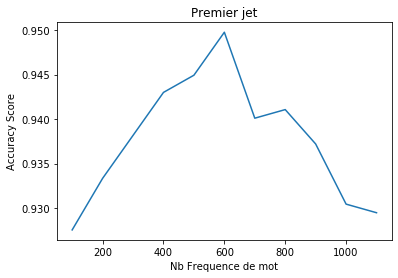

In [41]:
premier_jet(1200)

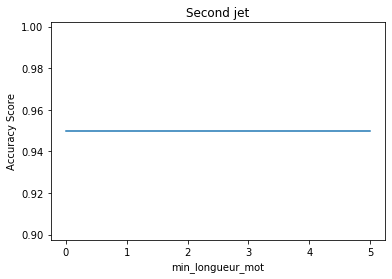

In [42]:
second_jet(5)

In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
premier_jet(1200)

In [ ]:
second_jet(5)

### Sans nous attarder sur les autres parametres qui peuvent etre modifie, conservons le modele "GaussianNB" et recherchons le meilleur parametrage pour le nombre de mots a conserver

In [ ]:
min_longueur_mot = 3
min_freq = 5
X = []
Y = []
for nb_frequence_mot  in range(1200,2000,100):
    Y.append(etude_parametre(min_longueur_mot,nb_frequence_mot,min_freq))
    X.append(nb_frequence_mot)
    pass

plt.plot(X,Y, color = 'purple')
plt.xlabel('Nb Frequence de mot')
# naming the y axis
plt.ylabel('Accuracy Score')

# giving a title to my graph
plt.title('Etude approfondi')
plt.show()

In [ ]:
min_longueur_mot = 3
min_freq = 5
X = []
Y = []
for nb_frequence_mot  in range(1550,1650,10):
    Y.append(etude_parametre(min_longueur_mot,nb_frequence_mot,min_freq))
    X.append(nb_frequence_mot)
    pass

plt.plot(X,Y, color = 'violet')
plt.xlabel('Nb Frequence de mot')
# naming the y axis
plt.ylabel('Accuracy Score')

# giving a title to my graph
plt.title('Amelioration')

ymax= max(Y)
les_sommets = np.where(Y == ymax)
#marquer les max
for maxi in les_sommets[0]:
    plt.annotate(X[maxi], xy=(X[maxi],ymax),xytext=(X[maxi], ymax+0.0001),
            arrowprops=dict(facecolor='red'),)


plt.show()
print('Le maximum de precision possible : ',ymax)